## Predicting heart Disease using Machine learning

Taking the approach:
1. Problem defination
2. data
3. evaluation
4. features
5. modelling
6. experimentation

### 1. Problem defination

In a statement,
> Given clinical parameteres about a patient, can we predict whether or not they have heart disease.

### 2. Data:

> It is a data of 14 columns, ranging for various factors that actually influence a heart- disease.

### 3. Evaluation:

> If we can reach 95% accuracy as predicting whether or not a patient has heart disease during the proof of concept, well pusue the project

### 4. Features:

> Target will be the target classified as y in the model. The other columns will be classified as X. The X contains the features of the particular model.
age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [7]:
# Data analysis modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

In [9]:
# Data:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### data exploration: to find out more about the data and become the expert on the dataset
**EDA-> Exploratory data analysis**

* what question looking to solve?
* what kind of data we have?
* are there missing datas?
* are there any outliers?
* how can you add change or remove features as we try to get more out of our data?

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


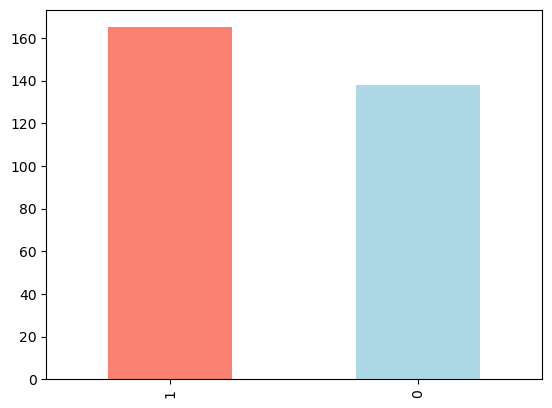

In [17]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Heart disease as per SEX:

In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


women have a 75% chance of having a heart disease...

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

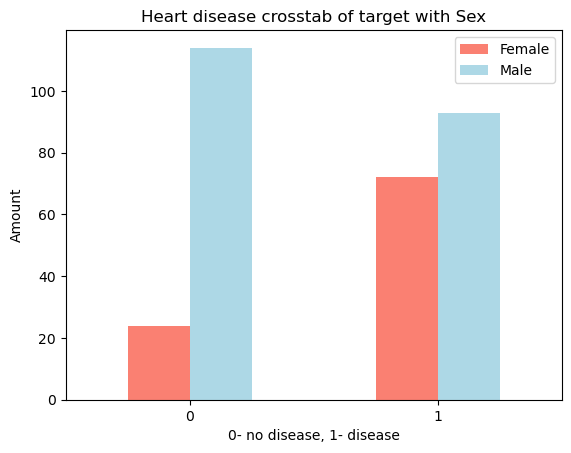

In [23]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon","lightblue"]);
plt.title("Heart disease crosstab of target with Sex")
plt.xlabel("0- no disease, 1- disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation =0)

### Age vs max heart rate for heart dis

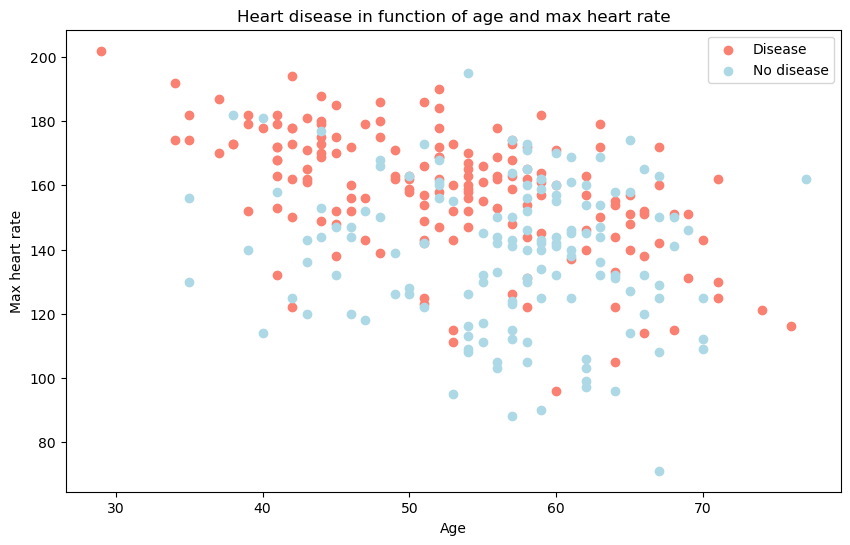

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1], c = "salmon")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0], c = "lightblue");
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No disease"])

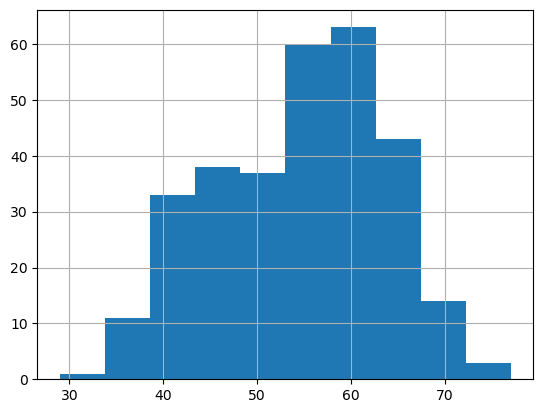

In [29]:
# check dist of age column with hist:
df.age.hist();

In [31]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


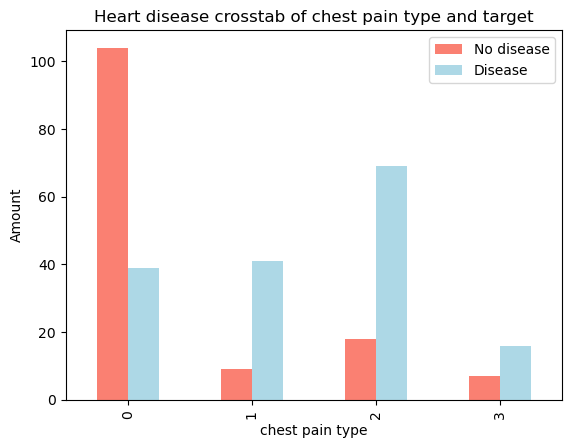

In [34]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon","lightblue"]);
plt.title("Heart disease crosstab of chest pain type and target")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])

In [36]:
# build a correlation matrix:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


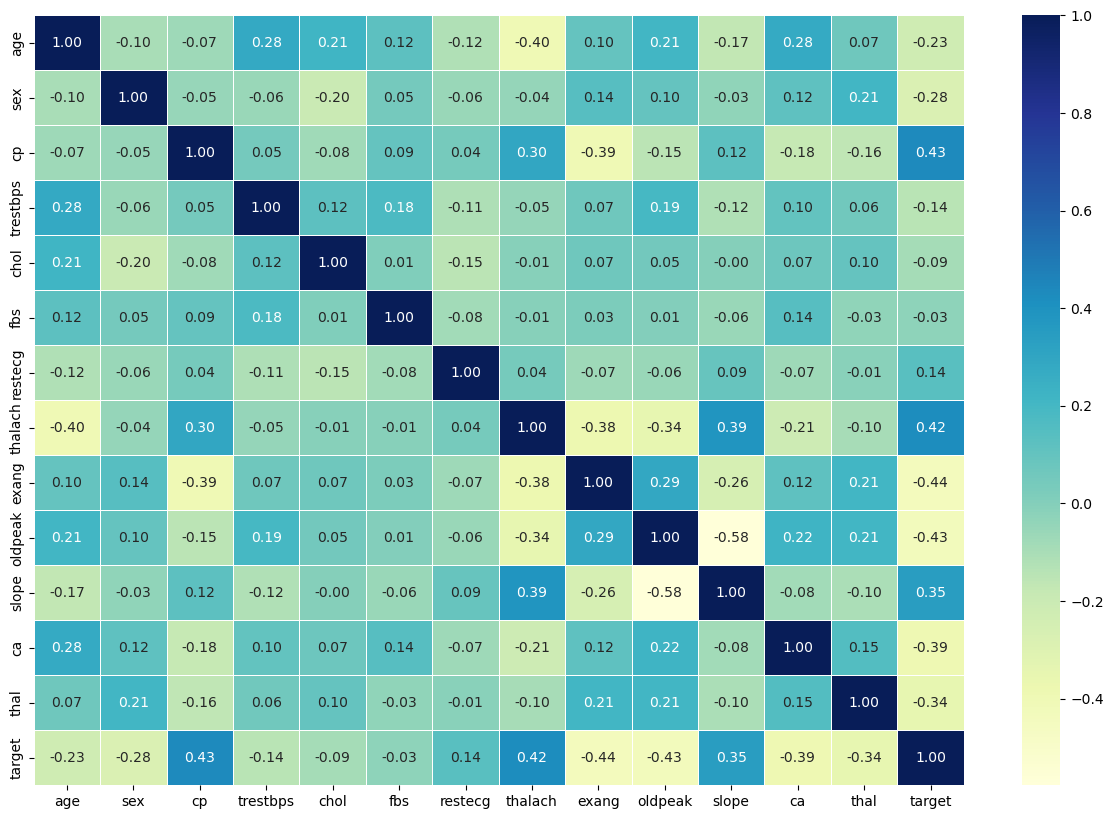

In [39]:
# corr a little prettier:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

a higher positive value means a higher correlation, as cp goes up, so does the target value.
a higher negative value means that if my exang goes up then my target value goes down subsequently.

### 5. Modeling:

In [41]:
np.random.seed(42)
X = df.drop("target", axis=1)
y = df["target"]

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [43]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### 3 models:

* Logistic regression
* K neighbor
* Ensemble

In [49]:
models = {"Logistic Regression": LogisticRegression(),"KNN": KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [50]:
scores = fit_and_score(models,X_train, X_test,y_train,y_test)
scores

C:\Users\karti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

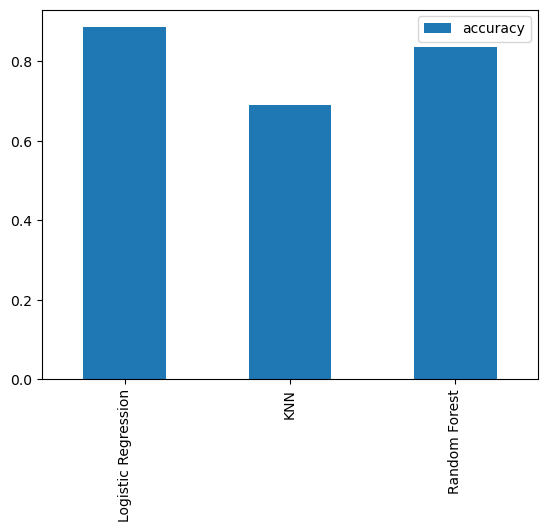

In [53]:
model_compare = pd.DataFrame(scores, index = ["accuracy"])
model_compare.T.plot.bar()

Logistic Regression model has outperformed random forest, by a fine margin.
KNN is out.

## Hyper param tuning:

In [55]:
# KNN:

train_scores = []
test_scores = []

# create a list of different n_neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

C:\Users\karti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\karti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [56]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [57]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn can score on the test data: 75.41%


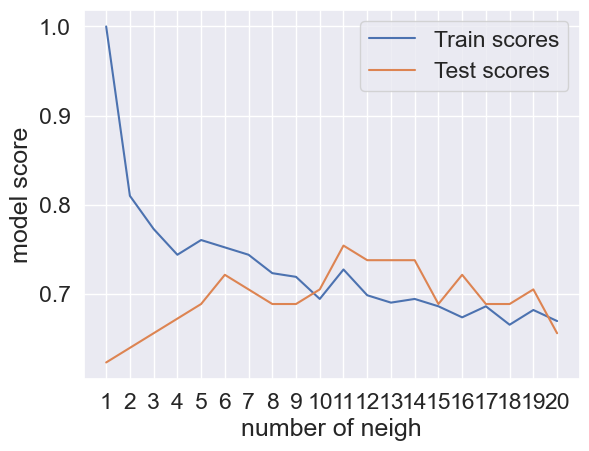

In [125]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neigh")
plt.ylabel("model score")
plt.legend()
print(f"maximum knn can score on the test data: {max(test_scores)*100:.2f}%")

## Hyper param with Randomized Search CV

Logistic regression and random forest using randomized search cv:

In [73]:
# create a hyper param grid for logistic regression:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":["liblinear"]}


# create hyper grid for random forest:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [69]:
np.random.seed(42)
rs_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=2)

rs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [70]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [71]:
rs_lr.score(X_test,y_test)

0.8852459016393442

In [74]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=2)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [75]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [76]:
rs_rf.score(X_test,y_test)

0.8688524590163934

Taking too much time for grid search cv

In [80]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [81]:
# since logistics is the best till now... tune with grid search....

log_reg = {"C":np.logspace(-1,4,30),"solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg,cv = 5, verbose=2)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............C=0.14873521072935114, solver=liblinear; total time=   0.0s
[CV] END ............C=0.14873521072935114, solver=liblinear; total time=   0.0s
[CV] END ............C=0.14873521072935114, solver=liblinear; total time=   0.0s
[CV] END ............C=0.14873521072935114, solver=liblinear; total time=   0.0s
[CV] END ............C=0.14873521072935114, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2212216291070449, solver=liblinear; total time=   0.0s
[CV] END .............C=0.2212216291070449, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 1.48735211e-01, 2.21221629e-01, 3.29034456e-01,
       4.89390092e-01, 7.27895384e-01, 1.08263673e+00, 1.61026203e+00,
       2.39502662e+00, 3.56224789e+00, 5.29831691e+00, 7.88046282e+00,
       1.17210230e+01, 1.74332882e+01, 2.59294380e+01, 3.85662042e+01,
       5.73615251e+01, 8.53167852e+01, 1.26896100e+02, 1.88739182e+02,
       2.80721620e+02, 4.17531894e+02, 6.21016942e+02, 9.23670857e+02,
       1.37382380e+03, 2.04335972e+03, 3.03919538e+03, 4.52035366e+03,
       6.72335754e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [82]:
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [83]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluation of lostic regression model:

In [84]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\karti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


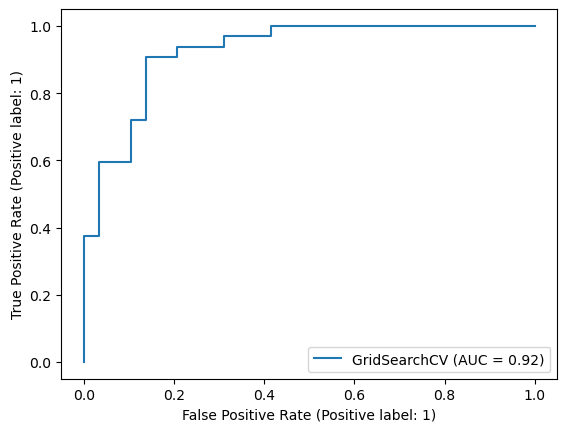

In [88]:
plot_roc_curve(gs_log_reg,X_test, y_test);

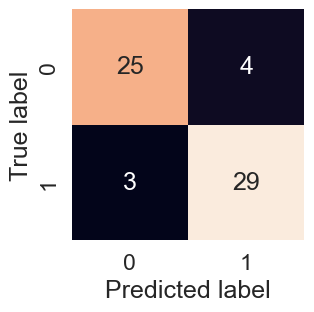

In [90]:
sns.set(font_scale = 1.5)
def plot_conf_mat (y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Precision:
the number of true positives (i.e. the number of items correctly labelled as belonging to the positive class) divided by the total number of elements labelled as belonging to the positive class 

In [92]:
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [94]:
clf = LogisticRegression(C= 0.2212216291070449, solver= 'liblinear')

In [96]:
cv_acc = cross_val_score(clf, X,y,cv=5,scoring='accuracy')
cv_acc.mean()

0.8479781420765027

In [97]:
cv_prec = cross_val_score(clf,X,y,cv=5,scoring = 'precision')
cv_prec.mean()

0.8215873015873015

In [99]:
cv_rec = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_rec.mean()

0.9272727272727274

In [100]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1.mean()

0.8705403543192143

<AxesSubplot:title={'center':'Cross val Classification metrics'}>

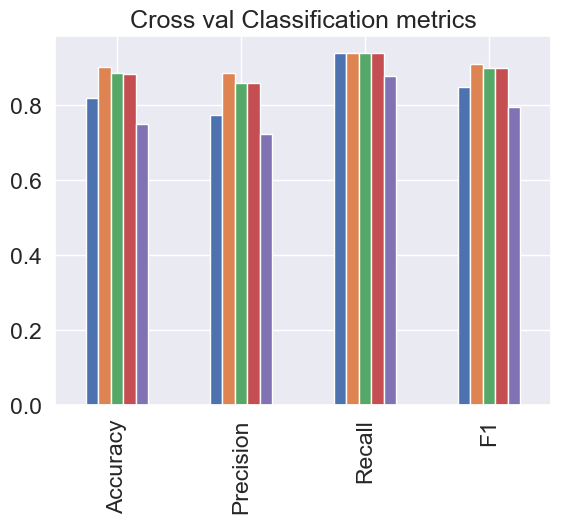

In [106]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,"Precision": cv_prec,"Recall":cv_rec,"F1":cv_f1})
cv_metrics.T.plot.bar(title="Cross val Classification metrics", legend=False)

### Feature importancs:

Features that contributed the maximum to the particular outcome.

Finding features is different for each model.

In [108]:
# fit an instance of logisticregression

clf = LogisticRegression(C= 0.2212216291070449, solver= 'liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=0.2212216291070449, solver='liblinear')

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
clf.coef_

array([[ 0.00349245, -0.88796916,  0.66918367, -0.01158797, -0.00169042,
         0.04686425,  0.32466999,  0.02468531, -0.62089933, -0.57279054,
         0.46279211, -0.64494485, -0.68916113]])

In [112]:
# match coeff of features to column:

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0034924505768488775,
 'sex': -0.8879691571740164,
 'cp': 0.6691836716495643,
 'trestbps': -0.011587970767984146,
 'chol': -0.0016904160055774195,
 'fbs': 0.04686424754960886,
 'restecg': 0.32466998693412263,
 'thalach': 0.02468530718360707,
 'exang': -0.6208993253461268,
 'oldpeak': -0.5727905415595221,
 'slope': 0.4627921086768734,
 'ca': -0.6449448511664444,
 'thal': -0.689161132666287}

<AxesSubplot:>

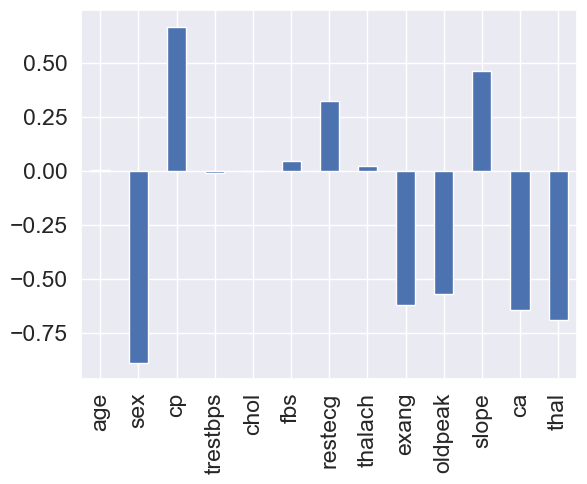

In [113]:
# visualize feature importance:

feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(legend=False)

In [114]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [115]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [116]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## Experimentation:

the evaluation metrics did not fulfill the 95% criteria:

* could collect more data
* could try better model? Catboost or XGboost?
* could we improve the current models? (beyond what we have done)
* if model is good enough, export it with pickle.


### Experiment of my own of XGboost, Catboost:

In [119]:
# XGboost:

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
xgb_clf.score(X_test,y_test)

0.819672131147541

In [121]:
xgb_clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [122]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]}

rs_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, cv=5, n_iter=20, verbose=2)
rs_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=7, reg_lambda=0, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.25, learning_rate=0.1, max_depth=7, reg_lambda=10, scale_pos_weight=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.25, learning_rate=0.1, max_depth=7, reg_lambda=10,

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [123]:
rs_xgb.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 1,
 'reg_lambda': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [124]:
rs_xgb.score(X_test,y_test)

0.8360655737704918

## Result:

Logistic Regressor model has the best accuracy for the particular dataset.